In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score

In [3]:
df=pd.read_excel('C:\\Users\\s08x55\\C_Drive_Folders\\Data\\WA_Fn-UseC_-Telco-Customer-Churn.xlsx')

In [4]:
df.shape

(7043, 21)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
pd.isnull(df).any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [9]:
new=df

In [10]:
new.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
for col in new.columns:
    if new[col].dtype=='object':
        new[col]=pd.Categorical(new[col]).codes 

In [12]:
new.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,74,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,3624,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,536,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,3570,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,674,1


In [13]:
new2=new.drop('customerID',axis=1)

In [14]:
new2=new2.drop('Churn',axis=1)
#Partner
#MultipleLines
#StreamingTV
#new2=new1.drop('StreamingMovies',axis=1)
#TotalCharges

In [15]:
new2=new2.drop('StreamingMovies',axis=1)

In [16]:
new2=new2.drop('TotalCharges',axis=1)

In [17]:
new2=new2.drop('StreamingTV',axis=1)

In [18]:
new2=new2.drop('Partner',axis=1)

In [19]:
#new2=new2.drop('MultipleLines',axis=1) AUC is decreasing

In [20]:
y=new['Churn']

In [21]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int8

In [22]:
x=new2

In [23]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.25,random_state=1)

In [24]:
train_x.shape

(5282, 15)

In [25]:
test_x.shape

(1761, 15)

In [26]:
train_y.shape
test_y.shape

(5282,)

(1761,)

In [27]:
log=LogisticRegression()

In [28]:
log.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
log.coef_

array([[-0.00867949,  0.24665085, -0.06791734, -0.0356704 , -0.93014851,
         0.09235048,  0.2616529 , -0.26077158, -0.1255814 , -0.09291964,
        -0.24044775, -0.63881062,  0.32844892,  0.0482183 ,  0.02889222]])

In [30]:
coef=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(log.coef_))],axis=1)

In [31]:
coef.columns=("Variable","Coef")

In [32]:
coef.sort_values('Variable',ascending=True)

,Variable,Coef
11,Contract,-0.638811
2,Dependents,-0.067917
9,DeviceProtection,-0.092920
6,InternetService,0.261653
14,MonthlyCharges,0.028892
5,MultipleLines,0.092350
8,OnlineBackup,-0.125581
7,OnlineSecurity,-0.260772
12,PaperlessBilling,0.328449
13,PaymentMethod,0.048218


In [33]:
classes=log.predict(test_x)
print('Positive Cases',test_y[test_y== 1].shape[0])
print('Negative Cases',test_y[test_y== 0].shape[0])

Positive Cases 434
Negative Cases 1327


In [34]:
print('Accuracy Score')
print(metrics.accuracy_score(test_y,classes))
print('Precision/Recall Metrics')
print(metrics.classification_report(test_y,classes))
print('AUC')
auc=metrics.roc_auc_score(test_y,classes)
auc

Accuracy Score
0.8052243043725156
Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.86      0.88      0.87      1327
          1       0.61      0.56      0.59       434

avg / total       0.80      0.81      0.80      1761

AUC


0.7234571588316393

(0, 1)

(0, 1)

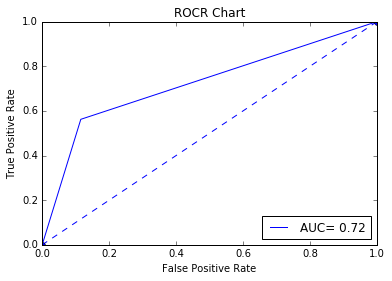

In [35]:
#ROC Chart
fpr, tpr, th =roc_curve(test_y,classes)
roc_auc=metrics.auc(fpr,tpr)
plt.title('ROCR Chart')
plt.plot (fpr,tpr,'b',label='AUC= %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



Confusion Matrix


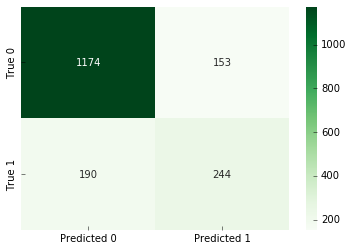

In [36]:
# Print Confusion Matrix
print('Confusion Matrix')
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [37]:
import statsmodels.api as sm
model=sm.GLM(y,x,family=sm.families.Binomial())
result=model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                            GLM   Df Residuals:                     7028
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2959.8
Date:                Thu, 01 Feb 2018   Deviance:                       5919.6
Time:                        14:25:20   Pearson chi2:                 7.36e+03
No. Iterations:                     8                                         
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
gender              -0.1197      0.063     -1.908      0.056        -0.243     0.003
SeniorCitizen        0.2062      0